In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = 12,10

Populating the interactive namespace from numpy and matplotlib


Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 27 days
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 27 days


This notebook will be used to help characterize the ring oscillator that we may end up using for the current proposed ADC (an AD-TDC).

The first test we want to perform is to see how long each inverter stage takes to change.  In the Watanabe paper, this is the equivalent of $T_D$

In [2]:
# This script will parse a CSV file taken from the Spectre Simulations and extract out the Early Voltage
import os
import sys
from scipy.optimize import leastsq
from pylab import *
import csv

#Global Functions and Variables

In [3]:
sampleTime = 20e-6

folderRoot="/home/noza/work/Braindrop/CDB/BDTests/RingOsc_test/Measurements/"

def readFile(folderRoot, fileName):
    with open(folderRoot+fileName) as fn:
        reader = csv.reader(fn)
        sampleTimes = list()
        for i, row in enumerate(reader):
            if i>1:
                sampleTimes.append(array(sorted(map(double,row[1::]))))
    return sampleTimes

def readFileUnsorted(folderRoot, fileName):
    with open(folderRoot+fileName) as fn:
        reader = csv.reader(fn)
        sampleTimes = list()
        for i, row in enumerate(reader):
            if i>1:
                sampleTimes.append(array(map(double,row[1::])))
    return sampleTimes

def readFile2(folderRoot, fileName):
    with open(folderRoot+fileName) as fn:
        reader = csv.reader(fn)
        freqs = list()
        for i, row in enumerate(reader):
            # Save a filtered form of the first row so that the second row can be compared to it.
            if i == 1:
                prevRow = filter(lambda x: x!='  ',row)
                #print prevRow
            if i>1:
                # Compare the length of the previous row vs the filtered current row
                # The filtering just checks that any double spaces are removed from the list
                # If the length of the rows differs, take the last value and add it to the list of freqs.
                if len(prevRow)!=len(filter(lambda x: x!='  ',row)):
                    #print len(prevRow), prevRow
                    #print len(filter(lambda x: x!='  ',row)), row
                    freqs.append(double(prevRow[-1]))
                # Save the filtered form of the current list as the previous row for the next iteration.
                prevRow = filter(lambda x: x!='  ',row)
        # Save the last row's freq as the last data point
        freqs.append(double(filter(lambda x: x!= '  ',row)[-1]))
    return list(reversed(freqs))

def plotFreqs(Xs, Ys, temp, pltRange, plotLog=False):
    rangeX, rangeY = pltRange[0], pltRange[1]    
    lenYs = len(Ys)
    if plotLog:
        loglog(Xs[:lenYs],Ys, '.-',label=str(temp)+"C")
    else:
        plot(Xs[:lenYs],Ys, '.-',label=str(temp)+"C")
    xlabel('$I_{in}$')
    ylabel('Freq (Hz)')
    title('Ring Oscillator Frequency vs $I_{in}$')
    xlim([0,rangeX])
    ylim([0,rangeY])

def plotGen(Xs, Ys, temp, pltRange, plotType='.-', plotLog=False, ttl='Default Title', xlbl='xLabel', ylbl='yLabel'):
    rangeX, rangeY = pltRange[0], pltRange[1]    
    lenYs = len(Ys)
    if plotLog:
        loglog(Xs[:lenYs],Ys, plotType, label=str(temp)+"C")
    else:
        plot(Xs[:lenYs],Ys, plotType, label=str(temp)+"C")
    xlabel(xlbl)
    ylabel(ylbl)
    title(ttl)
    xlim(rangeX)
    ylim(rangeY)

#Delay Analysis

## Starved Inverters

The calculation below shows that there is, on average, a $48.95 ns$ delay from each inverter when $I_{in}=10 nA$.  This circuit assumes that the inverter transistors are sized the same as the pull-up (PFET) and pull-down (NFET) transistors in the Ring Osc(RO) inverters.  In this case, that means that the pull-ups are sized as 3x the minimum size, while the pull-downs are 2x the minimum size.

In [23]:
fileName="DelayfromInvertertoInverter_HorizMarkers_Iin10n.csv"
sampleTimes = readFile(folderRoot, fileName)
#print "Sample Times", sampleTimes
delay = diff(array(sampleTimes))
InverterDelays = delay.T[1::].T
#print "Delays:", InverterDelays
print "Mean of Delays:", mean(InverterDelays)
numberOfInvStages = int(floor(sampleTime/mean(InverterDelays)))
print "Number of Inverter Stages in sample time:", numberOfInvStages

Mean of Delays: 7.89541914774e-08
Number of Inverter Stages in sample time: 253


The calculation below shows that there is, on average, a $33.65 ns$ delay from each inverter when $I_{in}=10 nA$.  This circuit assumes that the inverter transistors in the middle of the RO inverter are sized as minimum sized transistors.  The 3xPFET denotes the fact the pull-up transistor is sized as 3x the minimum size transistor.

In [19]:
fileName="DelayfromInvertertoInverter_HorizMarkers_Iin10n_MinSizeInverterTransistors_3xPFET.csv"
sampleTimes = readFile(folderRoot, fileName)
#print "Sample Times", sampleTimes
delay = diff(array(sampleTimes))
InverterDelays = delay.T[1::].T
#print "Delays:", InverterDelays
print "Mean of Delays:", mean(InverterDelays)
numberOfInvStages = int(floor(sampleTime/mean(InverterDelays)))
print "Number of Inverter Stages in sample time:", numberOfInvStages

Mean of Delays: 3.36526923809e-08
Number of Inverter Stages in sample time: 594


The calculation below shows that there is, on average, a $34.83 ns$ delay from each inverter when $I_{in}=10 nA$.  This circuit assumes that the inverter transistors in the middle of the RO inverter are sized as minimum sized transistors.  The 2xPFET denotes the fact the pull-up transistor is sized as 2x the minimum size transistor.  Otherwise this is the same circuit as the measurement above.

In [18]:
fileName="DelayfromInvertertoInverter_HorizMarkers_Iin10n_MinSizeInverterTransistors_2xPFET.csv"
sampleTimes = readFile(folderRoot, fileName)
#print "Sample Times", sampleTimes
delay = diff(array(sampleTimes))
InverterDelays = delay.T[1::].T
#print "Delays:", InverterDelays
print "Mean of Delays:", mean(InverterDelays)
numberOfInvStages = int(floor(sampleTime/mean(InverterDelays)))
print "Number of Inverter Stages in sample time:", numberOfInvStages

Mean of Delays: 3.4827699877e-08
Number of Inverter Stages in sample time: 574


The calculation below shows that there is, on average, a $35.35 ns$ delay from each inverter when $I_{in}=10 nA$.  This circuit assumes that the inverter transistors in the middle of the RO inverter are sized as minimum sized transistors.  The 2xPFET denotes the fact the pull-up transistor is sized as 2x the minimum size transistor.  This circuit also now includes the delay time of the NAND, because the NAND was "fixed" to be similar in delay to the inverters.  This fix required also adding the pull-up and pull-down transistors to the NAND, so that it wasn't exclusively digital logic.

In [17]:
fileName="DelayfromInvertertoInverter_HorizMarkers_Iin10n_MinSizeInverterTransistors_2xPFET_FixedNAND.csv"
sampleTimes = readFile(folderRoot, fileName)
#print "Sample Times", sampleTimes
InverterDelays = diff(array(sampleTimes))
#print "Delays:", InverterDelays
print "Mean of Delays:", mean(InverterDelays)
numberOfInvStages = int(floor(sampleTime/mean(InverterDelays)))
print "Number of Inverter Stages in sample time:", numberOfInvStages

Mean of Delays: 3.535306135e-08
Number of Inverter Stages in sample time: 565


The calculation below shows that there is, on average, a $35.14 ns$ delay from each inverter when $I_{in}=10 nA$.  This circuit assumes that the inverter transistors in the middle of the RO inverter are sized as minimum sized transistors.  The 2xPFET denotes the fact the pull-up transistor is sized as 2x the minimum size transistor.  The difference between this circuit and the previous measurement's circuit is that the sizing is now done by actually having 2 min-sized transistors in parallel, whereas the previous circuits were multiplying the width of the transistors by 2.  This circuit also still includes the delay time of the NAND, because the NAND was "fixed" to be similar in delay to the inverters.  This fix required also adding the pull-up and pull-down transistors to the NAND, so that it wasn't exclusively digital logic.  All circuits from here on out will implement the fixed NAND, because it appears to be a working solution.

In [15]:
fileName="DelayfromInvertertoInverter_HorizMarkers_Iin10n_MinSizeTransistors_2xPFET_FixedNAND.csv"
sampleTimes = readFile(folderRoot, fileName)
#print "Sample Times", sampleTimes
InverterDelays = diff(array(sampleTimes))
#print "Delays:", InverterDelays
print "Mean of Delays:", mean(InverterDelays)
numberOfInvStages = int(floor(sampleTime/mean(InverterDelays)))
print "Number of Inverter Stages in sample time:", numberOfInvStages

Mean of Delays: 3.51383387925e-08
Number of Inverter Stages in sample time: 569


Similar to the measurement above, this circuit assumes that all transistors are minimum sized by default and that multipliers implements the transistor as physically multiplied number of transistors.  This measurement should have theoretically sped the circuit up by a factor of 8x, because the pull-up and pull-down transistors were multiplied by 8x.  Interestingly, we are seeing a greater than 8x speed-up.

The 8x speed up was actually more like a 12x speed-up where the average delay was $2.71 ns$ when $I_{in}=10 nA$

In [22]:
fileName="DelayfromInvertertoInverter_HorizMarkers_Iin10n_MinSizeTransistors_8x2xPFET_FixedNAND.csv"
sampleTimes = readFile(folderRoot, fileName)
#print "Sample Times", sampleTimes
InverterDelays = diff(array(sampleTimes))
#print "Delays:\n", InverterDelays
print "Mean of Delays:", mean(InverterDelays)
numberOfInvStages = int(floor(sampleTime/mean(InverterDelays)))
print "Number of Inverter Stages in sample time:", numberOfInvStages

Mean of Delays: 2.71411092522e-09
Number of Inverter Stages in sample time: 7368


The measurement below is the same measurement as the previous measurement except that the pull-up and pull-down transistors are now sized as 2x the minimum size by multiplying the gate width by 2, as opposed to having twice as many devices (as in the previous measurement).

The average delay for this measurement was $2.86 ns$ when $I_{in}=10nA$

In [14]:
fileName="DelayfromInvertertoInverter_HorizMarkers_Iin10n_MinSizeInverterTransistors_8x2xPFET_FixedNAND.csv"
sampleTimes = readFile(folderRoot, fileName)
#print "Sample Times", sampleTimes
InverterDelays = diff(array(sampleTimes))
#print "Delays:", InverterDelays
print "Mean of Delays:", mean(InverterDelays)
numberOfInvStages = int(floor(sampleTime/mean(InverterDelays)))
print "Number of Inverter Stages in sample time:", numberOfInvStages

Mean of Delays: 2.86137716535e-09
Number of Inverter Stages in sample time: 6989


As can be seen in the measurements above, it appears that multiplying the width by 2 causes the speed to slow down ever so slightly.  The average inverter/NAND delay goes from 2.71 ns to 2.86ns in the latest measurements.  This is similar behavior to the earlier where the 2x width resulted in 35.35ns while the 2x devices resulted in 35.14ns.  Note: For the old measurements, the pull-up and pull-downs were sped up by a factor of 8, hence the slower speeds per inverter/NAND.

The measurement below is the same measurement as the one above, but taken with a different number of sample phases.  This was just to corroborate the consistency of the average delay number that was being measured.

In [38]:
fileName="DelayfromInvertertoInverter_HorizMarkers_Iin10n_MinSizeInverterTransistors_8x2xPFET_FixedNAND2.csv"
sampleTimes = readFile(folderRoot, fileName)
#print "Sample Times", array(sampleTimes)
InverterDelays = diff(array(sampleTimes))
#print "Delays:", InverterDelays
print "Mean of Delays:", mean(InverterDelays)
numberOfInvStages = int(floor(sampleTime/mean(InverterDelays)))
print "Number of Inverter Stages in sample time:", numberOfInvStages

Mean of Delays: 2.87387784073e-09
Number of Inverter Stages in sample time: 6959


###Temperature Analysis

After measuring the performance of one ring oscillator, we wanted to see how temperature would affect the average stage to stage delay.  If this variance is small, then it would be totally feasible to have a design with many stages and many parallel pull-up and pull-down transistors without needing any temperature compensation circuitry.  If the delay varied too much over the temperature range from $0 ^{\circ} C-50^{\circ}C$, then we would need to find a way to also include temperature compensation

In [64]:
numTs = 11   # Number of temperature steps that were measured

#fileName="InverterDelay_TempSweep_Iin10n_MinSizeInverterTransistors_8x2xPFET.csv"
fileName="InverterDelay_TempSweep_Iin10n_MinSizeTransistors_8x2xPFET_0to50C_11Temps.csv"
sampleTimes = readFileUnsorted(folderRoot, fileName)
#print "Sample Times", sampleTimes
# Split times up by temperature
startTemp = 0
stopTemp = 50
stepSize = (stopTemp-startTemp)/(numTs-1)
temps = range(startTemp,stopTemp+1, stepSize)
tempSampleTimes = dict()
avgDelays = list()
for i in range(numTs):
    print ""
    tempSampleTimes[i] = array(sampleTimes)[:,i::numTs]
    print "Temperature:", temps[i], " C"
    InverterDelays = diff(array(tempSampleTimes[i]))
    #if temps[i]==25:
    #    #print "Sample Times:\n", array(tempSampleTimes[i])
    #    print "Delays:\n", InverterDelays
    print "Mean of Delays:", mean(InverterDelays)
    avgDelays.append(mean(InverterDelays))
    numberOfInvStages = int(floor(sampleTime/mean(InverterDelays)))
    print "Number of Inverter Stages in sample time:", numberOfInvStages
#print "Overall average: ", mean(avgDelays)
#print "Standard Deviation: ", std(avgDelays)


Temperature: 0  C
Mean of Delays: 3.00772917004e-09
Number of Inverter Stages in sample time: 6649

Temperature: 5  C
Mean of Delays: 2.93690374633e-09
Number of Inverter Stages in sample time: 6809

Temperature: 10  C
Mean of Delays: 2.86681343343e-09
Number of Inverter Stages in sample time: 6976

Temperature: 15  C
Mean of Delays: 2.80126256962e-09
Number of Inverter Stages in sample time: 7139

Temperature: 20  C
Mean of Delays: 2.73196258773e-09
Number of Inverter Stages in sample time: 7320

Temperature: 25  C
Mean of Delays: 2.67253996308e-09
Number of Inverter Stages in sample time: 7483

Temperature: 30  C
Mean of Delays: 2.6123349517e-09
Number of Inverter Stages in sample time: 7655

Temperature: 35  C
Mean of Delays: 2.55545180292e-09
Number of Inverter Stages in sample time: 7826

Temperature: 40  C
Mean of Delays: 2.49823462125e-09
Number of Inverter Stages in sample time: 8005

Temperature: 45  C
Mean of Delays: 2.44678101921e-09
Number of Inverter Stages in sample time

Because the temperature analysis above shows that there is a considerable variance on the delay based on the ambient temperature, we think it is better to have a short chain of inverters and a large digital counter.  Assuming our theory pans out, this will allow us to have a temperature compensation circuit that doubles the size of the ADC, but ends up taking less space because there will be much fewer inverters.

###Starved NANDs
Also, because of the mismatch in the timing of NANDs and inverters, we are going to use NANDs with one of their input gates permanently pulled high to act as an inverter.  This will help ensure that the delay is similar between all the "inverters".  This is known as using "starved NANDs".

In [67]:
fileName="NANDDelay_Iin10n_MinSizeTransistors_8x2xPFET.csv"
sampleTimes = readFile(folderRoot, fileName)
#print "Sample Times", array(sampleTimes)
InverterDelays = diff(array(sampleTimes))
print "Delays:", InverterDelays
print "Mean of Delays:", mean(InverterDelays)
numberOfInvStages = int(floor(sampleTime/mean(InverterDelays)))
print "Number of Inverter Stages in sample time:", numberOfInvStages

Delays: [[  1.06944406e-09   1.44821970e-09]
 [  1.47306966e-09   1.12305574e-09]
 [  1.15515399e-09   1.51106599e-09]
 [  1.53579594e-09   1.19956285e-09]
 [  1.22544653e-09   1.56780941e-09]
 [  1.58861629e-09   1.26502283e-09]
 [  1.28607564e-09   1.61466308e-09]
 [  1.62813521e-09   1.32077509e-09]
 [  1.33629940e-09   1.65214141e-09]]
Mean of Delays: 1.38890849031e-09
Number of Inverter Stages in sample time: 14399


Below is a test with the exact same setup as the previous test, but with more samples.  This test was run because it was noticed that the delays of each gate were getting longer as time went on.  More samples allows us to see if this effect saturates at some point.

In [20]:
fileName="NANDDelay_Iin10n_MinSizeTransistors_8x2xPFET_moresamples.csv"
sampleTimes = readFile(folderRoot, fileName)
#print "Sample Times", array(sampleTimes)
InverterDelays = diff(array(sampleTimes))
#print "Delays:", InverterDelays
print "Mean of Delays:", mean(InverterDelays)
numberOfInvStages = int(floor(sampleTime/mean(InverterDelays)))
print "Number of Inverter Stages in sample time:", numberOfInvStages

Mean of Delays: 1.57185947995e-09
Number of Inverter Stages in sample time: 12723


It does saturate, as can be seen in the data above.  One theory for why the firing rates varied over time and eventually saturated had to do with the fact that the pull-up and pull-down transistors' gate voltages weren't constant over time.  As such, we have buffered these lines with an ideal buffer (a VCVS) to ensure that they gate voltage is what we want it to be.

In [21]:
fileName="InverterDelay_Iin5n_16x2xPFET_BufferedLines.csv"
sampleTimes = readFile(folderRoot, fileName)
#print "Sample Times", array(sampleTimes)
InverterDelays = diff(array(sampleTimes))
#print "Delays:", InverterDelays
print "Mean of Delays:", mean(InverterDelays)
numberOfInvStages = int(floor(sampleTime/mean(InverterDelays)))
print "Number of Inverter Stages in sample time:", numberOfInvStages

Mean of Delays: 1.32008264125e-09
Number of Inverter Stages in sample time: 15150


It turns out that by adding the buffer, the frequency stays constant over time.

# Frequency vs $I_{in}$ Analysis

In this section we will analyze how input current, $I_{in}$ affects the output frequency of the ring oscillator.  Ideally we want the freq. vs $I_{in}$ plot to be linear.  For some of the measurements, we are also going to sweep over temperature, with the hope that it will show little to no variance over temperature.

In [6]:
folderRoot2="/home/noza/work/Braindrop/CDB/BDTests/RingOsc_test/Measurements/OscFreq_IinandTempSweep/"
Iins = array([1e-11,  3.162278e-11, 1e-10, 3.162278e-10, 1e-9, 3.162278e-9, 1e-8])
temps = range(0,51,5)
#print Iins, "\n", temps

##Single Input, Single-output Starved Inverters

The analysis below is for a ring oscillator made from a chain of conventional single-input, single-ended starved inverters.

_Note: this plot is old and as such shows $I_{in}$ vs $F$, which skews the nonlinearity a little bit_

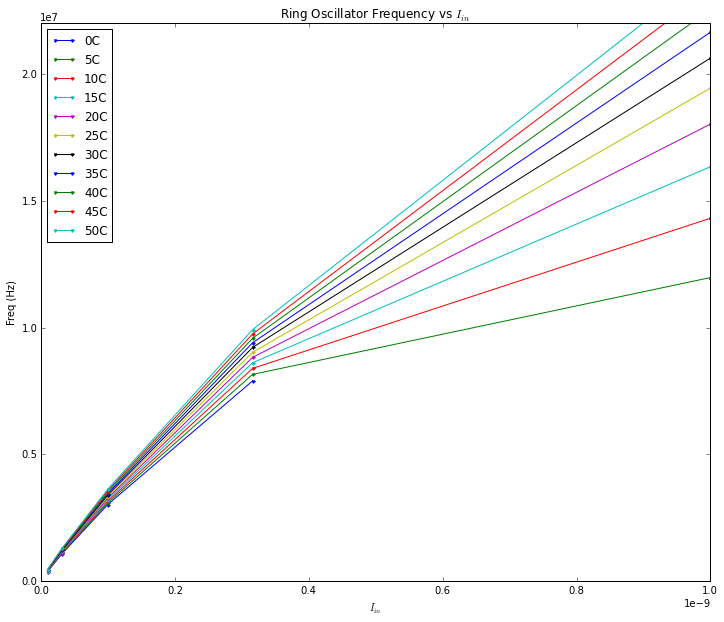

In [43]:
# Iterate over temperatures, plot each FI curve.
for curTemp in temps:
    fileName="IinandTempSweep_Iin10pto10n_Temp"+str(curTemp)+"C.csv"
    #print fileName
    freqs = readFile2(folderRoot2, fileName)
    #print curTemp, "C, Frequencies:\n", array(freqs)
    plotFreqs(Iins, freqs, curTemp, [1e-9, 2.2e7])
    legend(loc='best')

##Differential Input, Dual-output Starved Inverters

The analysis below is for a ring oscillator made from a chain of differential input, differential output inverters.  This is the first design we are testing with a cross-coupled load, and two diode connected transistors as part of the load circuitry.  The ring oscillator in this chain has 5 stages.

Min frequencies: [35354.148239490372, 100826.61706089511, 289076.81876605429, 831657.88998443808, 2397842.7580633331, 6898664.5866295677, 19559266.550873019]
Max frequencies: [46119.008489465581, 127667.78776616549, 356781.63227945432, 1005050.563229623, 2844761.2460496649, 8054955.248547717, 22593051.777194671]


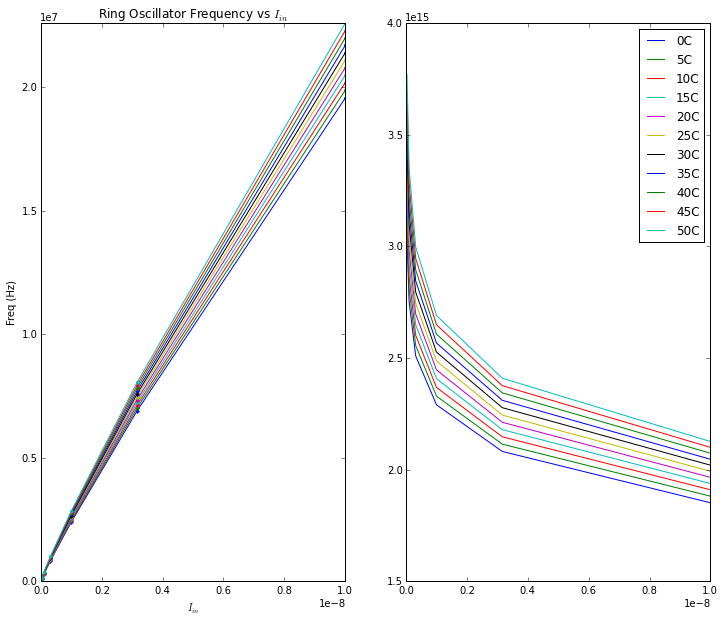

In [116]:
freqs1 = list(list())
for curTemp in temps:
    fileName = "DiffInverter_IinandTempSweep_Iin10pto10n_Temp"+str(curTemp)+"C.csv"
    diffInv_freqs1 = readFile2(folderRoot2, fileName)
    freqs1.append(diffInv_freqs1)
    #print autodiffInv_freqs
    subplot(1,2,1)
    plotFreqs(Iins,diffInv_freqs1, curTemp, [max(Iins), max(diffInv_freqs1)])
    subplot(1,2,2)
    plot(Iins[1:], diff(diffInv_freqs1)/diff(Iins), label=str(curTemp)+"C")
legend(loc='best')

print "Min frequencies:", [min(curList) for curList in array(freqs1).T]
print "Max frequencies:", [max(curList) for curList in array(freqs1).T]

###CommonTail

####16 Tail Gates

As can be seen in the plot above, the FI curve of a ring oscillator is much more linear using differential delay elements.  Kwabena suggested that the paper he was reading noted that using a common tail between all the inverters would make the circuit even more linear.  As such, the plots/code below, investigates whether this is true or not.  I also took this opportunity to cut out two stages and make this oscillator with only 3 delay elements.

Min frequencies: [13618.284850405211, 38913.661757377267, 112030.6926165152, 325120.46515975421, 947888.97607545485, 2783287.4926935979, 8206868.1192142097]
Max frequencies: [18778.904815375521, 51069.332997714751, 141239.94470771169, 395543.99407452159, 1122895.3872946161, 3218230.7334447349, 9327363.7406863682]


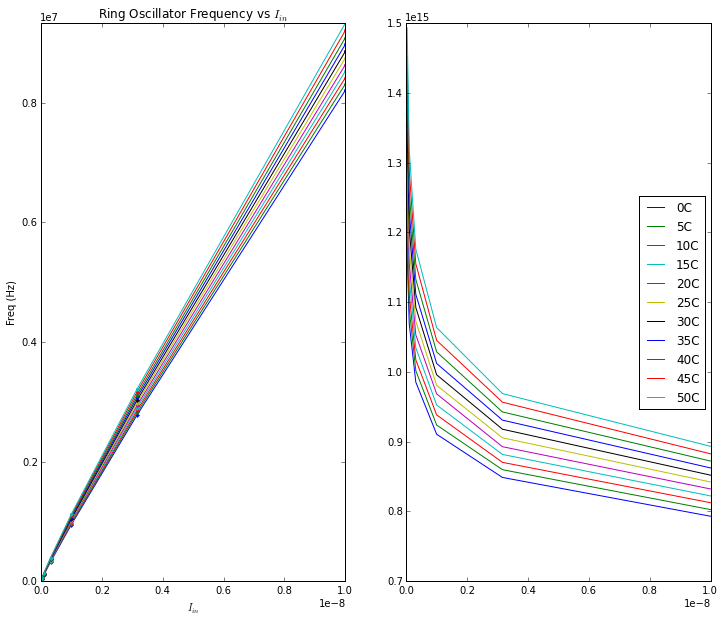

In [117]:
freqs2 = list(list())
for curTemp in temps:
    fileName = "DiffInverter_CommonTail_IinandTempSweep_Iin10pto10n_Temp"+str(curTemp)+"C.csv"
    diffInv_freqs2 = readFile2(folderRoot2, fileName)
    freqs2.append(diffInv_freqs2)
    subplot(1,2,1)
    plotFreqs(Iins,diffInv_freqs2, curTemp, [max(Iins), max(diffInv_freqs2)])
    subplot(1,2,2)
    plot(Iins[1:], diff(diffInv_freqs2)/diff(Iins), label=str(curTemp)+"C")
legend(loc='right')

print "Min frequencies:", [min(curList) for curList in array(freqs2).T]
print "Max frequencies:", [max(curList) for curList in array(freqs2).T]

####32 Tail Gates

As can be seen, adding a single common tail (with the same sizing as each delay element used to have), slows down the overall circuit, but also makes the circuit more linear.  This is determined by looking at the ratio of the slope at the smaller input currents relative to the slope at the larger input currents.  For individual tails, the ratio is roughly ~2, while for a common tail it is ~1.5.  Therefore the linearity improved, but is still non-linear.

The next thing I wanted to check was how this linearity ratio would change if I increased the amount of drive the tail current would pull.  I did this by going from 16 tail gates (as was the default above) to 32 tail gates in the plot immediately below, and 128 tail gates the plot below that.  What is concerting to see is that the overall speeds increased almost linearly, and therefore the linearity ratio didn't change by much between the faster nodes and the slower nodes.

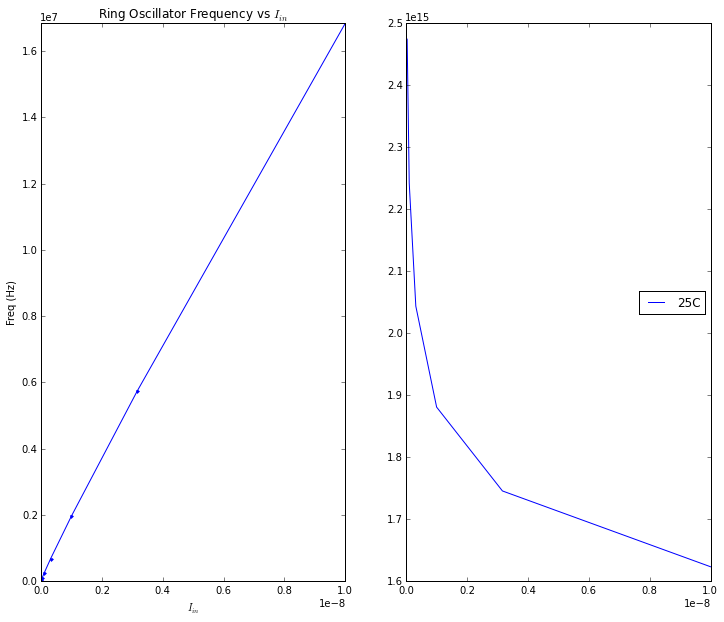

In [100]:
for curTemp in [25]:
    fileName = "DiffInverter_CommonTail_IinandTempSweep_Iin10pto10n_Temp"+str(curTemp)+"C_32TailGates.csv"
    autodiffInv_freqs3 = readFile2(folderRoot2, fileName)
    subplot(1,2,1)
    plotFreqs(Iins,autodiffInv_freqs3, curTemp, [max(Iins), max(autodiffInv_freqs3)])
    subplot(1,2,2)
    plot(Iins[1:], diff(autodiffInv_freqs3)/diff(Iins), label=str(curTemp)+"C")
legend(loc='right')

####128 Tail Gates

This analysis is the first analysis that properly shows the linearity as a function of $\frac{1}{I_{in}}$ vs $T$

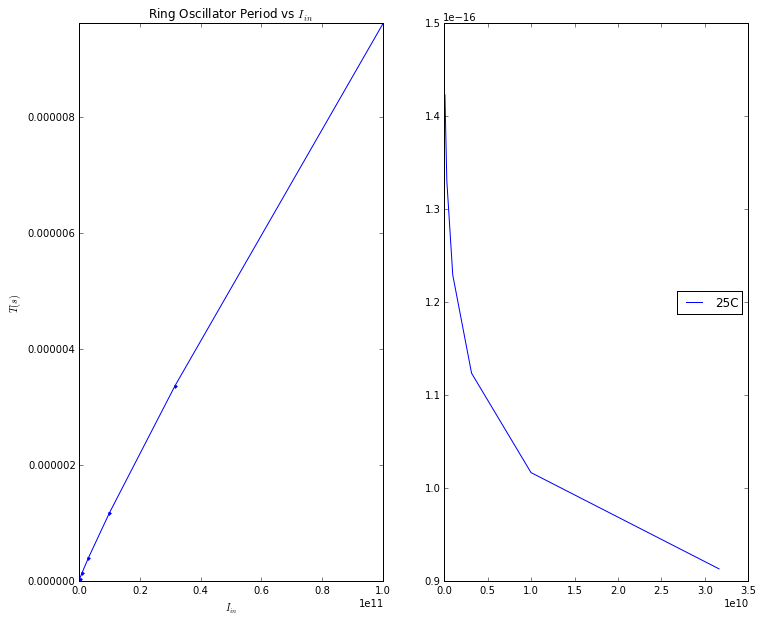

In [45]:
#for curTemp in [25]:
#    fileName = "DiffInverter_CommonTail_IinandTempSweep_Iin10pto10n_Temp"+str(curTemp)+"C_128TailGates.csv"
#    autodiffInv_freqs4 = array(readFile2(folderRoot2, fileName))
#    subplot(1,2,1)
#    plotFreqs(Iins,autodiffInv_freqs4, curTemp, [max(Iins), max(autodiffInv_freqs4)])
#    subplot(1,2,2)
#    plot(Iins[1:], diff(autodiffInv_freqs4)/diff(Iins), label=str(curTemp)+"C")
#legend(loc='right')

for curTemp in [25]:
    fileName = "DiffInverter_CommonTail_IinandTempSweep_Iin10pto10n_Temp"+str(curTemp)+"C_128TailGates.csv"
    autodiffInv_freqs4 = array(readFile2(folderRoot2, fileName))
    subplot(1,2,1)
    plotGen(1./Iins,1./autodiffInv_freqs4, curTemp, [max(1./Iins), max(1./autodiffInv_freqs4)],
            ttl='Ring Oscillator Period vs $I_{in}$',
            xlbl='$I_{in}$',
            ylbl='$T(s)$')
    subplot(1,2,2)
    plot(1./Iins[1:], diff(1./autodiffInv_freqs4)/diff(1./Iins), label=str(curTemp)+"C")
legend(loc='right')

##Delayed Inverters

Having talked to Kwabena about this differential delay element, and its nonlinearity (even though it is better than the previous starved inverter design), we decided that this would still not be good enough.  We believe that this nonlinearity is coming from the fact that the $V_s$ node is different for different input currents.  As such, the gate-source voltage for each of the input NMOS transistors changes depending on $I_{in}$.  This means that amount of capacitance on each of the input transistors is different for different input currents, and we know from the C-V curve of transistor, that this change is nonlinear.

Because this is our current hypothesis, we are going to try out another circuit design that uses single-ended inverter with a variable delay circuit in the middle of the output of one inverter and the input of the next inverter.  The math for this circuit is written below, which shows that $I_{in}$ is inversely proportional to the time constant($\frac{C U_{t}}{I_{in}}$), which should be the only thing that affects the delay of the delay circuit.  Therefore, we think that this circuit will be linear.

$$ C \frac{dV}{dt} = I_{in} + I_{in} e^{\frac{-V}{U_t}} $$
$$ I_{out} = I_{0} e^{\frac{V}{U_t}} $$
$$ \frac{C U_{t}}{I_{out}} \frac{dI_{out}}{dt} = I_{in} + \frac{I_{in} I_{0}}{I_{out}} $$
$$ \frac{C U_{t}}{I_{in}} \frac{dI_{out}}{dt} = I_{out} + I_{0} $$


The plots below show the linearity of the the oscillator frequency with respect to input current using this new delayed inverter design.

In [7]:
delayInv_folderRoot="/home/noza/work/Braindrop/CDB/BDTests/RingOsc_test/Measurements/OscFreq_DelayInv_IinandTempSweep/"
paramFile = open(delayInv_folderRoot+"SweptParams.csv")
for i, row in enumerate(csv.reader(paramFile)):
    if i == 0:
        temps = array(row[1:])
        print "Temps: ", temps
    elif i==1:
        Iins = array(double(row[1:]))
        print "Iins: ", Iins
    else:
        print "Too many rows"

Temps:  ['0' '5' '10' '15' '20' '25' '30' '35' '40' '45' '50']
Iins:  [  1.00000000e-11   2.15443469e-11   4.64158883e-11   1.00000000e-10
   2.15443469e-10   4.64158883e-10   1.00000000e-09   2.15443469e-09
   4.64158883e-09   1.00000000e-08]


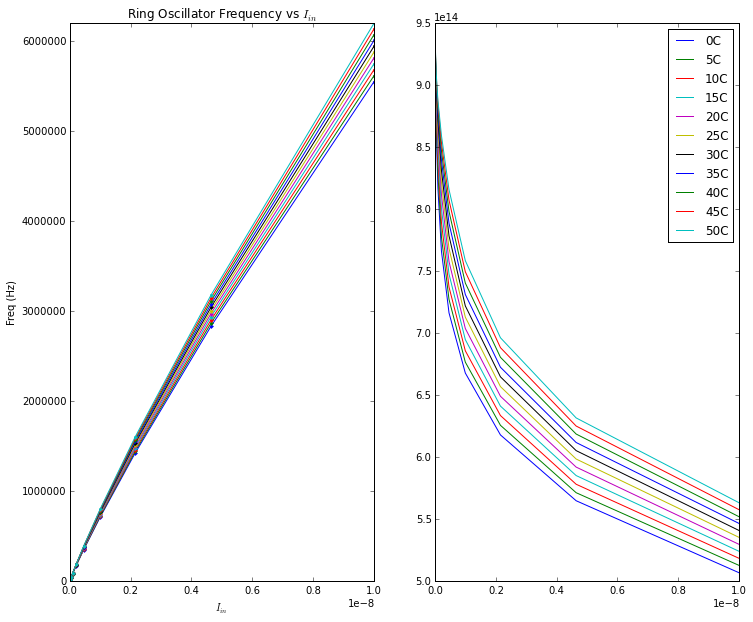

In [37]:
allFreqs = list(list())
for curTemp in temps:
    fileName = "DelayInv_IinandTempSweep_Iin10pto10n_Temp"+str(curTemp)+"C.csv"
    delayInv_freqs = readFile2(delayInv_folderRoot, fileName)
    allFreqs.append(delayInv_freqs)
    subplot(1,2,1)
    plotFreqs(Iins,delayInv_freqs, curTemp, [max(Iins), max(delayInv_freqs)])   # Plot using linear axes
    #plotFreqs(Iins,delayInv_freqs, curTemp, [max(Iins), max(delayInv_freqs)], True)  # Plot using log-log axes
    subplot(1,2,2)
    plot(Iins[1:], diff(delayInv_freqs)/diff(Iins), label=str(curTemp)+"C")
legend(loc='best')

####Measuring T instead of $f$


In talking to Kwabena, he pointed out that using a measurement of F vs $I_{in}$ is not a good way to measure the linearity, and that instead I should be using the actual period. The reason for this is because we know that the inverter itself will add an independent, fixed delay per inverter, while the delay portion should vary linearly with the input current.  As such, we should be plotting the period T with respect to the inverse of the input current, $\frac{1}{I_{in}}$

In [8]:
def linfit(xdata, params):
    m, b, I0 = params
    return m/(xdata-I0) + b

def linfitErr(params, xdata, ydata):
    m, b, I0 = params
    
    return ydata - (m/(xdata-I0) + b)
    #return ydata - linfit(xdata, params)

[  1.09143803e+00   2.30786765e-01  -3.77654850e-04]


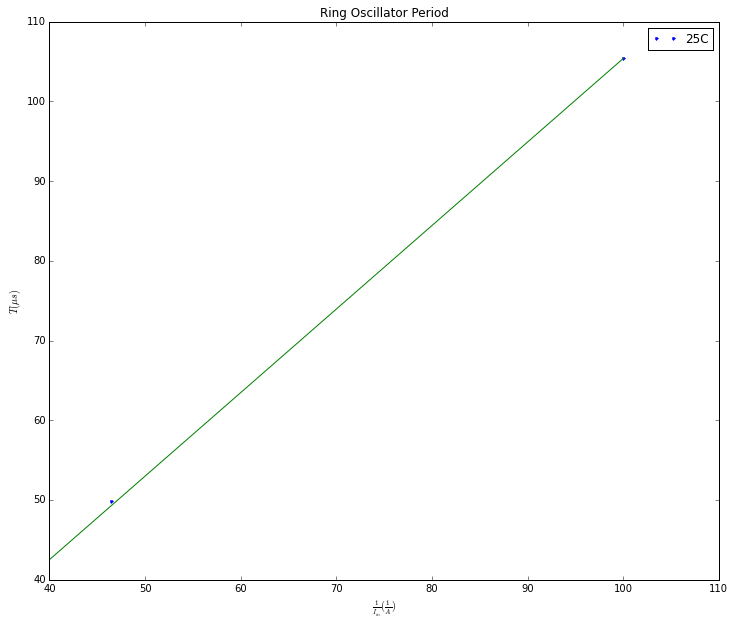

In [178]:
allTs = list(list())
scaledIins = Iins*1e9
invIins = 1./scaledIins
for curTemp in [25]:#temps:
    fileName = "DelayInv_IinandTempSweep_Iin10pto10n_Temp"+str(curTemp)+"C.csv"
    delayInv_Freqs = array(readFile2(delayInv_folderRoot, fileName))
    delayInv_Ts = (1./delayInv_Freqs)*1e6
    allTs.append(delayInv_Ts)
    #print delayInv_Ts
    #print invIins
    x_th = linspace(min(scaledIins),max(scaledIins), num=100)
    sol = leastsq(linfitErr, (1.1, 0.001, 0), (scaledIins, delayInv_Ts))
    print sol[0]
    Ts_th = linfit(x_th, sol[0])

    #subplot(1,2,1)
    # Plot on a linear scale
    #plotGen(invIins,delayInv_Ts, curTemp, [[0,max(invIins)], [0,max(delayInv_Ts)]],
    plotGen(invIins,delayInv_Ts, curTemp, [[40,110],[40,110]],
            plotType = '.',
            ttl='Ring Oscillator Period',
            xlbl='$\\frac{1}{I_{in}} (\\frac{1}{A})$',
            ylbl='$T(\mu s)$')
    plot(1./x_th, Ts_th, '-')
    # Plot on a log-log scale
    #plotGen(invIins,delayInv_Ts, curTemp, [max(invIins), max(delayInv_Ts)], True,
    #        ttl='Ring Oscillator Period',
    #        xlbl='$\\frac{1}{I_{ign}} (\\frac{1}{nA})$',
    #        ylbl='$T(\mu s)$')
    #subplot(1,2,2)
    ## Plot the derivative
    #derivTs = diff(delayInv_Ts)/diff(invIins)
    #plotGen(invIins[1:], derivTs, curTemp, [[0,max(invIins[1:])],[min(derivTs),max(derivTs)]],
    #        plotType='-',
    #        ttl='Derivative of Ring Oscillator Period',
    #        xlbl='$\\frac{1}{I_{in}} (\\frac{1}{A})$',
    #        ylbl='$\\frac{dT}{dI_{in}}$')
legend(loc='best')



###Cascoded Bias Mirror for Delayed Inverter design

The plot below uses a cascoded mirror where each of the "bias" gates now have another transistor on its source node.  By doing this, we can, theoretically, more accurately reflects the circuits mirroring configuration.

[ 138.4242832    66.00267174   31.8492016    15.56725248    7.68978871
    3.82990923    1.92205042    0.97414151    0.50090271    0.26295486]
[ 100.           46.41588834   21.5443469    10.            4.64158883
    2.15443469    1.            0.46415888    0.21544347    0.1       ]
[  1.46031153e+00   5.16649087e-01  -5.95765433e-04]


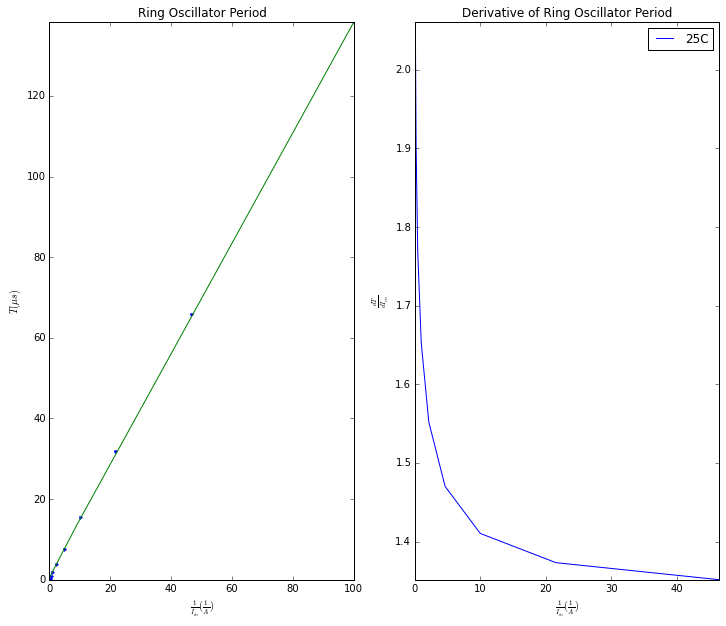

In [195]:
allTs = list(list())
scaledIins = Iins*1e9

invIins = 1./scaledIins

for curTemp in [25]:#temps:
    fileName = "DelayInv_CascodedMirror_IinandTempSweep_Iin10pto10n_Temp"+str(curTemp)+"C.csv"
    delayInv_Freqs = array(readFile2(delayInv_folderRoot, fileName))
    delayInv_Ts = (1./delayInv_Freqs)*1e6
    allTs.append(delayInv_Ts)
    print delayInv_Ts
    print invIins
    x_th = linspace(min(scaledIins),max(scaledIins), num=100)
    sol = leastsq(linfitErr, (1.1, 0.001, 0), (scaledIins, delayInv_Ts))
    print sol[0]
    Ts_th = linfit(x_th, sol[0])

    subplot(1,2,1)
    # Plot on a linear scale
    plotGen(invIins,delayInv_Ts, curTemp, [[0,max(invIins)], [0,max(delayInv_Ts)]],
    #plotGen(invIins,delayInv_Ts, curTemp, [[0,10],[0,10]],
            plotType = '.',
            ttl='Ring Oscillator Period',
            xlbl='$\\frac{1}{I_{in}} (\\frac{1}{A})$',
            ylbl='$T(\mu s)$')
    plot(1./x_th, Ts_th)
    # Plot on a log-log scale
    #plotGen(invIins,delayInv_Ts, curTemp, [max(invIins), max(delayInv_Ts)], True,
    #        ttl='Ring Oscillator Period',
    #        xlbl='$\\frac{1}{I_{ign}} (\\frac{1}{nA})$',
    #        ylbl='$T(\mu s)$')
    subplot(1,2,2)
    # Plot the derivative
    derivTs = diff(delayInv_Ts)/diff(invIins)
    plotGen(invIins[1:], derivTs, curTemp, [[0,max(invIins[1:])],[min(derivTs),max(derivTs)]],
            plotType='-',
            ttl='Derivative of Ring Oscillator Period',
            xlbl='$\\frac{1}{I_{in}} (\\frac{1}{A})$',
            ylbl='$\\frac{dT}{dI_{in}}$')
legend(loc='best')

### Schmitt Trigger-based Delayed Inverter Chain

Because the cascode doesn't help and the previous design, with the delayed inverter, still behaves non-linearly, Kwabena thought that trying a schmitt trigger (to invert the signals) would operate more linearly.  He believes that the positive feedback will make it such that after the circuit trips and begins to truly invert, it will do it with a positive feedback, thereby making that portion of the inversion immune to how quickly/slowly the input is changing.

[  2.33521032e+00   5.92081896e-01  -8.47716447e-04]


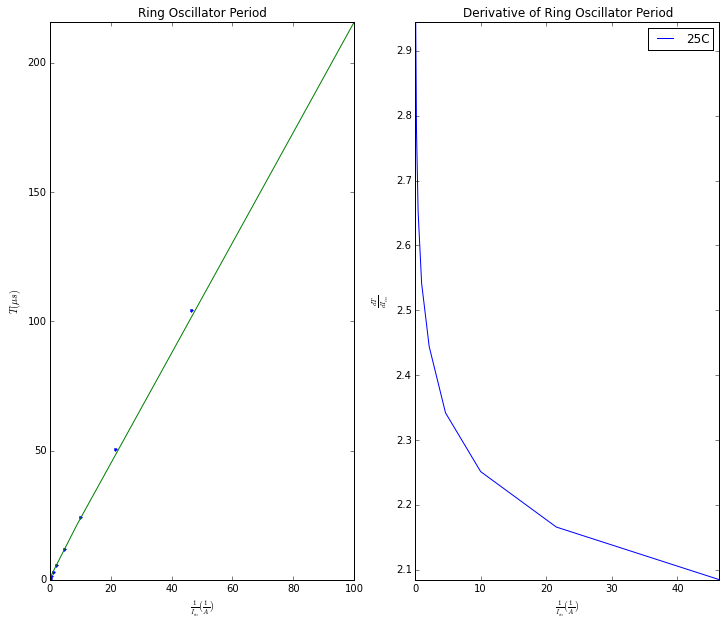

In [9]:
allTs = list(list())
scaledIins = Iins*1e9

invIins = 1./scaledIins

for curTemp in [25]:#temps:
    fileName = "DelayInv_Schmitt_IinandTempSweep_Iin10pto10n_Temp"+str(curTemp)+"C.csv"
    delayInv_Freqs = array(readFile2(delayInv_folderRoot, fileName))
    delayInv_Ts = (1./delayInv_Freqs)*1e6
    allTs.append(delayInv_Ts)
    #print delayInv_Ts
    #print invIins
    x_th = linspace(min(scaledIins),max(scaledIins), num=100)
    sol = leastsq(linfitErr, (1.1, 0.001, 0), (scaledIins, delayInv_Ts))
    print sol[0]
    Ts_th = linfit(x_th, sol[0])

    subplot(1,2,1)
    # Plot on a linear scale
    plotGen(invIins,delayInv_Ts, curTemp, [[0,max(invIins)], [0,max(delayInv_Ts)]],
    #plotGen(invIins,delayInv_Ts, curTemp, [[0,10],[0,10]],
            plotType = '.',
            ttl='Ring Oscillator Period',
            xlbl='$\\frac{1}{I_{in}} (\\frac{1}{A})$',
            ylbl='$T(\mu s)$')
    plot(1./x_th, Ts_th)
    subplot(1,2,2)
    # Plot the derivative
    derivTs = diff(delayInv_Ts)/diff(invIins)
    plotGen(invIins[1:], derivTs, curTemp, [[0,max(invIins[1:])],[min(derivTs),max(derivTs)]],
            plotType='-',
            ttl='Derivative of Ring Oscillator Period',
            xlbl='$\\frac{1}{I_{in}} (\\frac{1}{A})$',
            ylbl='$\\frac{dT}{dI_{in}}$')
legend(loc='best')

###Cascoded Bias Mirror for Schmitt Trigger-based Delayed Inverter Chain

This is the same test as before, but uses cascoded mirrors to mirror in the $I_{in}$ current.

[  2.33118244e+00   5.83955405e-01  -8.42655340e-04]


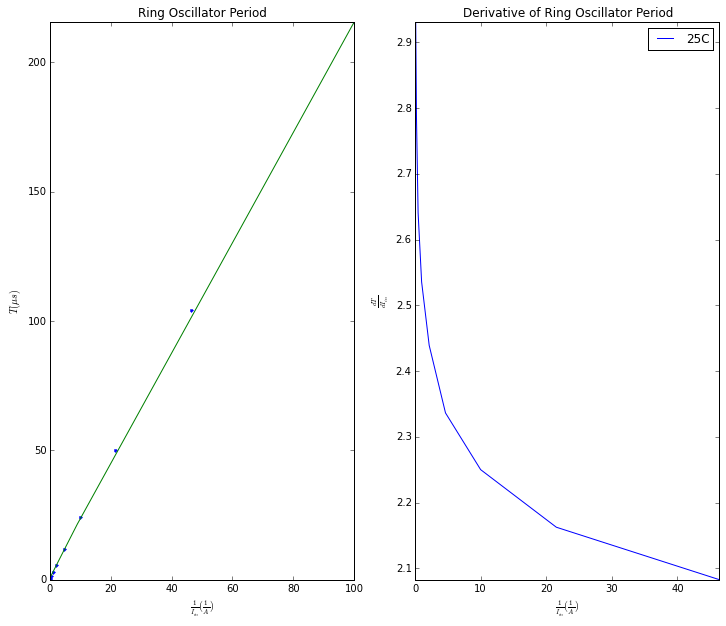

In [203]:
allTs = list(list())
scaledIins = Iins*1e9

invIins = 1./scaledIins

for curTemp in [25]:#temps:
    fileName = "DelayInv_Schmitt_CascodedMirror_IinandTempSweep_Iin10pto10n_Temp"+str(curTemp)+"C.csv"
    delayInv_Freqs = array(readFile2(delayInv_folderRoot, fileName))
    delayInv_Ts = (1./delayInv_Freqs)*1e6
    allTs.append(delayInv_Ts)
    #print delayInv_Ts
    #print invIins
    x_th = linspace(min(scaledIins),max(scaledIins), num=100)
    sol = leastsq(linfitErr, (1.1, 0.001, 0), (scaledIins, delayInv_Ts))
    print sol[0]
    Ts_th = linfit(x_th, sol[0])

    subplot(1,2,1)
    # Plot on a linear scale
    plotGen(invIins,delayInv_Ts, curTemp, [[0,max(invIins)], [0,max(delayInv_Ts)]],
    #plotGen(invIins,delayInv_Ts, curTemp, [[0,10],[0,10]],
            plotType = '.',
            ttl='Ring Oscillator Period',
            xlbl='$\\frac{1}{I_{in}} (\\frac{1}{A})$',
            ylbl='$T(\mu s)$')
    plot(1./x_th, Ts_th)
    subplot(1,2,2)
    # Plot the derivative
    derivTs = diff(delayInv_Ts)/diff(invIins)
    plotGen(invIins[1:], derivTs, curTemp, [[0,max(invIins[1:])],[min(derivTs),max(derivTs)]],
            plotType='-',
            ttl='Derivative of Ring Oscillator Period',
            xlbl='$\\frac{1}{I_{in}} (\\frac{1}{A})$',
            ylbl='$\\frac{dT}{dI_{in}}$')
legend(loc='best')

Once again, we see that using the cascoded mirrors (for the biasing of $I_{in}$) doesn't really help.  My hypothesis for this is that the $V_f$ node almost always goes to the rails, and therefore, modeling them as mirrors with no cascoding, is still accurate for much of the duration of the rise and fall of $V_s$

##Starved Inverters - $2^{nd}$ time around

In talking to Ben, I realized that I measured the capacity of a regular inverter vs a starved inverter incorrectly the first time around.  As such, I played around with how a starved inverter works, and ensured that the inverter portion could always pass the full current requirements of the control gates.  The plots below show the results of this, to see if the circuit still operates non-linearly.  If the circuit still operates non-linearly, then we know that something else is the cause of the non-linearity, whereas, if the non-linearity disappears, then we'll know that the compression was occuring because of the maximum current limit of the inverter.

[  2.66657221e+01  -3.73977196e+00   5.65903968e-04]


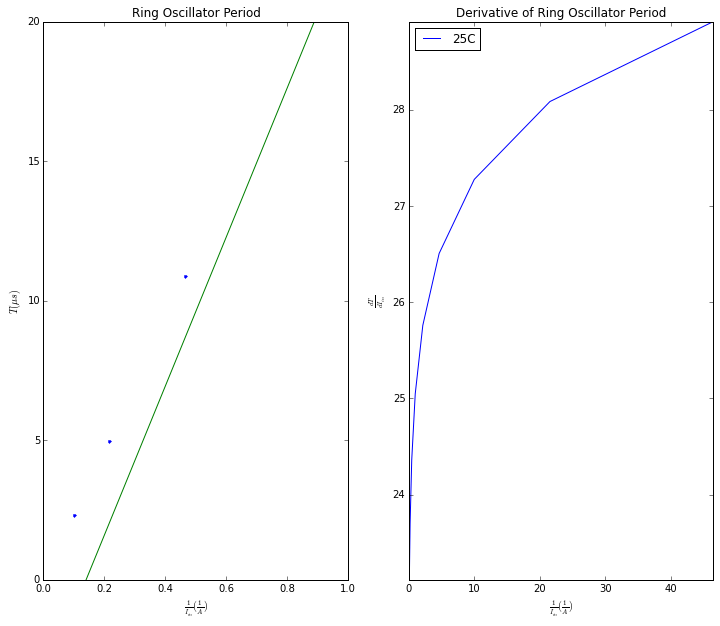

In [10]:
allTs = list(list())
scaledIins = Iins*1e9

invIins = 1./scaledIins

for curTemp in [25]:#temps:
    fileName = "StarvedInv_FullSpeedInverter_IinandTempSweep_Iin10pto10n_Temp"+str(curTemp)+"C.csv"
    delayInv_Freqs = array(readFile2(delayInv_folderRoot, fileName))
    delayInv_Ts = (1./delayInv_Freqs)*1e6
    allTs.append(delayInv_Ts)
    #print delayInv_Ts
    #print invIins
    x_th = linspace(min(scaledIins),max(scaledIins), num=100)
    sol = leastsq(linfitErr, (1.1, 0.001, 0), (scaledIins, delayInv_Ts))
    print sol[0]
    Ts_th = linfit(x_th, sol[0])

    subplot(1,2,1)
    # Plot on a linear scale
    #plotGen(invIins,delayInv_Ts, curTemp, [[0,max(invIins)], [0,max(delayInv_Ts)]],
    plotGen(invIins,delayInv_Ts, curTemp, [[0,1],[0,20]],
            plotType = '.',
            ttl='Ring Oscillator Period',
            xlbl='$\\frac{1}{I_{in}} (\\frac{1}{A})$',
            ylbl='$T(\mu s)$')
    plot(1./x_th, Ts_th)
    subplot(1,2,2)
    # Plot the derivative
    derivTs = diff(delayInv_Ts)/diff(invIins)
    plotGen(invIins[1:], derivTs, curTemp, [[0,max(invIins[1:])],[min(derivTs),max(derivTs)]],
            plotType='-',
            ttl='Derivative of Ring Oscillator Period',
            xlbl='$\\frac{1}{I_{in}} (\\frac{1}{A})$',
            ylbl='$\\frac{dT}{dI_{in}}$')
legend(loc='best')

The previous "full-speed" inverter used Thick-Oxide, but ensured that the inverter was able to pass as much current as the throttles would allow.  The data below shows the performance of an inverter that uses Thin-Oxide transistors (sized as P900nx60n and N800nx60n) to get faster output speeds.

[  2.64846787e+00  -9.88362923e-01  -4.16443812e-06]


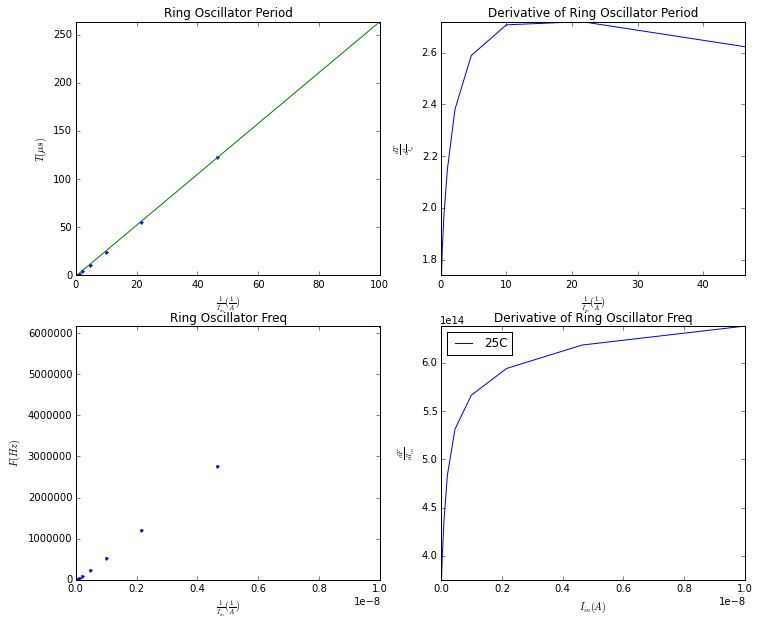

In [11]:
allTs = list(list())
scaledIins = Iins*1e9

invIins = 1./scaledIins

for curTemp in [25]:#temps:
    fileName = "StarvedInv_FullSpeedThinFETInverter_IinandTempSweep_Iin10pto10n_Temp"+str(curTemp)+"C.csv"
    delayInv_Freqs = array(readFile2(delayInv_folderRoot, fileName))
    delayInv_Ts = (1./delayInv_Freqs)*1e6
    allTs.append(delayInv_Ts)
    #print delayInv_Ts
    #print invIins
    x_th = linspace(min(scaledIins),max(scaledIins), num=100)
    sol = leastsq(linfitErr, (1.1, 0.001, 0), (scaledIins, delayInv_Ts))
    print sol[0]
    Ts_th = linfit(x_th, sol[0])

    subplot(2,2,1)
    # Plot on a linear scale
    plotGen(invIins,delayInv_Ts, curTemp, [[0,max(invIins)], [0,max(delayInv_Ts)]],
    #plotGen(invIins,delayInv_Ts, curTemp, [[0,10],[0,10]],
            plotType = '.',
            ttl='Ring Oscillator Period',
            xlbl='$\\frac{1}{I_{in}} (\\frac{1}{A})$',
            ylbl='$T(\mu s)$')
    plot(1./x_th, Ts_th)
    subplot(2,2,3)
    plotGen(Iins,delayInv_Freqs, curTemp, [[0,max(Iins)], [0,max(delayInv_Freqs)]],
    #plotGen(invIins,delayInv_Ts, curTemp, [[0,10],[0,10]],
            plotType = '.',
            ttl='Ring Oscillator Freq',
            xlbl='$\\frac{1}{I_{in}} (\\frac{1}{A})$',
            ylbl='$F(Hz)$')
    
    subplot(2,2,2)
    # Plot the derivative
    derivTs = diff(delayInv_Ts)/diff(invIins)
    plotGen(invIins[1:], derivTs, curTemp, [[0,max(invIins[1:])],[min(derivTs),max(derivTs)]],
            plotType='-',
            ttl='Derivative of Ring Oscillator Period',
            xlbl='$\\frac{1}{I_{in}} (\\frac{1}{A})$',
            ylbl='$\\frac{dT}{d\\frac{1}{I_{in}}}$')
    
    subplot(2,2,4)
    derivFs = diff(delayInv_Freqs)/diff(Iins)
    plotGen(Iins[1:], derivFs, curTemp, [[0,max(Iins[1:])],[min(derivFs),max(derivFs)]],
            plotType='-',
            ttl='Derivative of Ring Oscillator Freq',
            xlbl='$I_{in} (A)$',
            ylbl='$\\frac{dF}{dI_{in}}$')
legend(loc='best')